In [1]:
from matplotlib import pyplot as plt
import fastf1
from fastf1 import utils
import numpy as np
from fastf1 import plotting

# Qualifying Lap comparison

In [2]:
fastf1.plotting.setup_mpl(misc_mpl_mods=False, color_scheme='fastf1')

session = fastf1.get_session(2025, 'Japan', 'Q')

session.load()
fast_verstappen = session.laps.pick_drivers('VER').pick_fastest()
fast_norris = session.laps.pick_drivers('NOR').pick_fastest()


req         WARNING 	DEFAULT CACHE ENABLED! (24.0 KB) /Users/vini/Library/Caches/fastf1
core           INFO 	Loading data for Japanese Grand Prix - Qualifying [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 

In [3]:
car_mv = fast_verstappen.get_car_data().add_distance()
car_ln = fast_norris.get_car_data().add_distance()


In [4]:
rbr_color = fastf1.plotting.get_team_color(fast_verstappen['Team'], session=session)
mcl_color = fastf1.plotting.get_team_color(fast_norris['Team'], session=session)

req            INFO 	Using cached data for driver_info


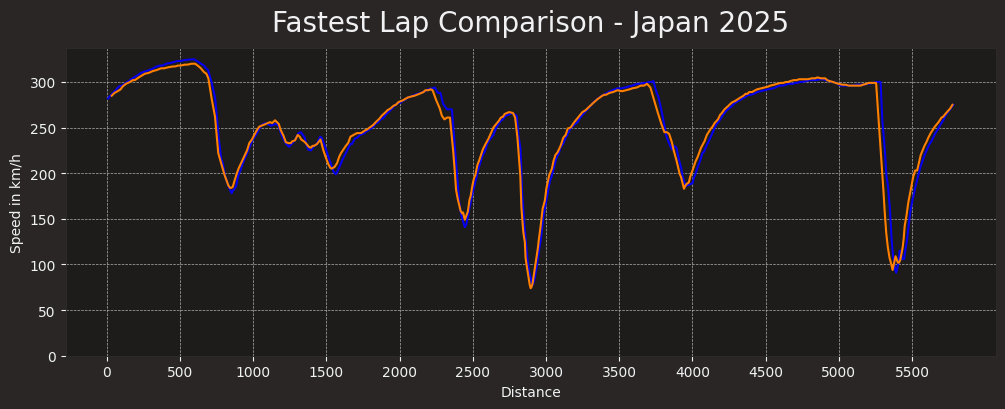

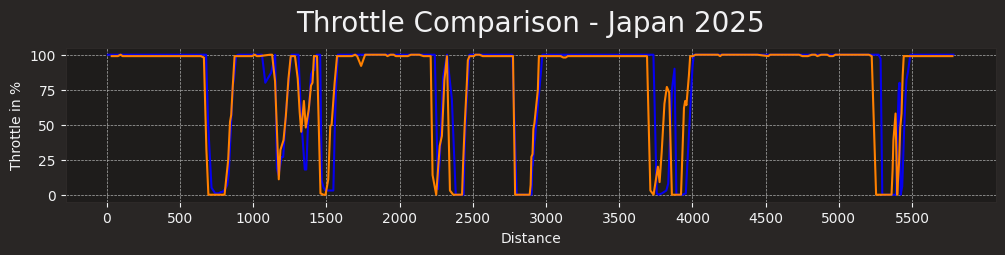

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/fastf1/utils.py:89: FutureWarning: `utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.
  warnings.warn("`utils.delta_time` is considered deprecated and will"


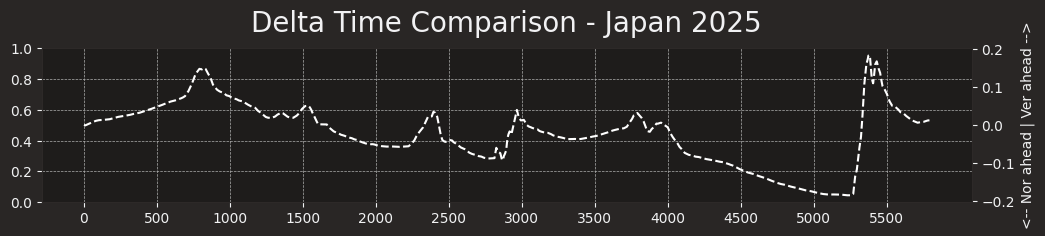

In [5]:
fig, ax = plt.subplots(figsize=(12, 4), dpi=100)
ax.set_title('Fastest Lap Comparison - Japan 2025', fontsize=20)

ax.plot(car_mv['Distance'], car_mv['Speed'], color=rbr_color, label='VER')
ax.plot(car_ln['Distance'], car_ln['Speed'], color=mcl_color, label='NOR')

ax.set_xlabel('Distance')
ax.set_ylabel('Speed in km/h')

ax.set_xticks(np.arange(0, car_mv['Distance'].max(), 500))  # Intervalos no eixo X
ax.set_yticks(np.arange(0, max(car_mv['Speed'].max(), car_ln['Speed'].max()), 50)) # Intervalos no eixo Y
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()

fig, ax = plt.subplots(figsize=(12, 2), dpi=100)
ax.set_title('Throttle Comparison - Japan 2025', fontsize=20)
ax.plot(car_mv['Distance'], car_mv['Throttle'], color=rbr_color, label='VER')
ax.plot(car_ln['Distance'], car_ln['Throttle'], color=mcl_color, label='NOR')
ax.set_xticks(np.arange(0, car_mv['Distance'].max(), 500))  # Intervalos no eixo X

ax.set_xlabel('Distance')
ax.set_ylabel('Throttle in %')

ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()

delta_time, ref_tel, compare_tel = utils.delta_time(fast_verstappen, fast_norris)
# Verstappen is the reference driver, Norris is the comparison driver

fig, ax = plt.subplots(figsize=(12, 2), dpi=100)
ax.set_title('Delta Time Comparison - Japan 2025', fontsize=20)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.set_xticks(np.arange(0, car_mv['Distance'].max(), 500))  # Intervalos no eixo X

twin = ax.twinx()
twin.plot(ref_tel['Distance'], delta_time, '--', color='white')
twin.set_ylabel("<-- Nor ahead | Ver ahead -->")

plt.show()


### • Based on this analysis, it is possible to conclude that the MCL39 is likely to be running with slightly lower downforce specs compared to the RB21. Despite minimal differences in braking points and throttle application, the McLaren consistently gains time on every straight of the circuit, as shown on the Delta Time Comparison graph.
### • The RedBull car is likely to have some balance issues. In turns 4, 5, and 6 (around Distance 1000–1500), the RB21 has to lift off the throttle much more than the MCL39.
### • Verstappen gained the most time in the last chicane, braking considerably later than Norris and everyone else, which secured him pole position

# Race Pace Comparison

In [6]:
Race = fastf1.get_session(2025, 'Japan', 'R')

Race.load()
pace_ver = Race.laps.pick_drivers('VER').pick_quicklaps()
pace_nor = Race.laps.pick_drivers('NOR').pick_quicklaps()
pace_pia = Race.laps.pick_drivers('PIA').pick_quicklaps()

core           INFO 	Loading data for Japanese Grand Prix - Race [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No c

In [7]:
pace_ver['LapTime'] = pace_ver['LapTime'].dt.total_seconds()
pace_nor['LapTime'] = pace_nor['LapTime'].dt.total_seconds()
pace_pia['LapTime'] = pace_pia['LapTime'].dt.total_seconds()

/var/folders/1m/898rjvbd6jb9zl60yhl1rgnr0000gn/T/ipykernel_36317/3363891719.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pace_pia['LapTime'] = pace_pia['LapTime'].dt.total_seconds()


### • 10KG of added weight is about 0.3s in lap time. By dividing the maximum starting fuel (110kg) by the total of laps of the Grand Prix (53 for the Japanese Grand Prix), we have the car's average fuel consumption
### • That is the simplest way (and more effective way) to correct the laptimes without insider informations 

In [8]:
combustivel_inicial = 110
voltas = 53
consumo_medio = combustivel_inicial / voltas
dez_kg = 0.3

tempo_real_ver = pace_ver['LapTime']
tempo_real_nor = pace_nor['LapTime']
tempo_real_pia = pace_pia['LapTime']

tempos_ver_neutralizados = []
temos_nor_neutralizados = []
tempos_pia_neutralizados = []

for volta, tempo_real_ver in enumerate(tempo_real_ver, start=1):
    combustivel_atual = combustivel_inicial - (volta * consumo_medio)
    ajuste = (combustivel_atual / 10) * dez_kg
    tempo_neutralizado = tempo_real_ver - ajuste
    tempos_ver_neutralizados.append(tempo_neutralizado)
    
for volta, tempo_real_nor in enumerate(tempo_real_nor, start=1):
    combustivel_atual = combustivel_inicial - (volta * consumo_medio)
    ajuste = (combustivel_atual / 10) * dez_kg
    tempo_neutralizado = tempo_real_nor - ajuste
    temos_nor_neutralizados.append(tempo_neutralizado)

for volta, tempo_real_pia in enumerate(pace_pia['LapTime'], start=1):
    combustivel_atual = combustivel_inicial - (volta * consumo_medio)
    ajuste = (combustivel_atual / 10) * dez_kg
    tempo_neutralizado = tempo_real_pia - ajuste
    tempos_pia_neutralizados.append(tempo_neutralizado)


pace_ver['LapTime'] = tempos_ver_neutralizados
pace_nor['LapTime'] = temos_nor_neutralizados
pace_pia['LapTime'] = tempos_pia_neutralizados

/var/folders/1m/898rjvbd6jb9zl60yhl1rgnr0000gn/T/ipykernel_36317/713726392.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pace_pia['LapTime'] = tempos_pia_neutralizados


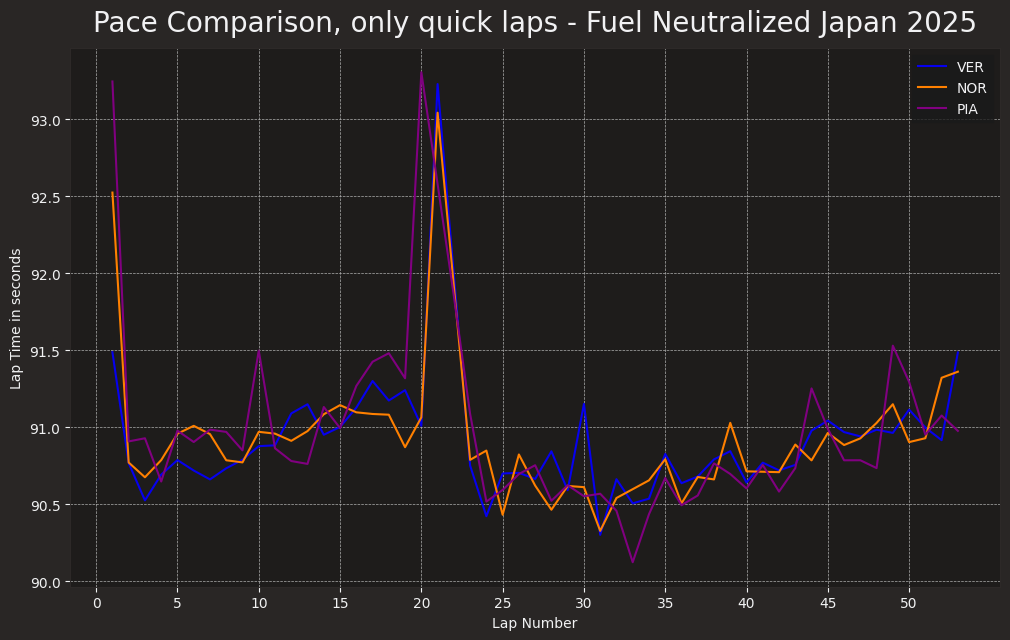

In [9]:
fig, ax = plt.subplots(figsize=(12, 7), dpi=100)
ax.set_title('Pace Comparison, only quick laps - Fuel Neutralized Japan 2025', fontsize=20)

ax.plot(pace_ver['LapNumber'], pace_ver['LapTime'], color=rbr_color, label='VER')
ax.plot(pace_nor['LapNumber'], pace_nor['LapTime'], color=mcl_color, label='NOR')
ax.plot(pace_pia['LapNumber'], pace_pia['LapTime'], color='purple', label='PIA')
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

ax.set_xticks(np.arange(0, pace_ver['LapNumber'].max(), 5))  # Intervalos no eixo X

ax.set_xlabel('Lap Number')
ax.set_ylabel('Lap Time in seconds')
ax.legend()

plt.show()


In [10]:
media_ver = pace_ver['LapTime'].mean()
media_nor = pace_nor['LapTime'].mean()
media_pia = pace_pia['LapTime'].mean()
print(f"Media VER: {media_ver:.3f}")
print(f"Media NOR: {media_nor:.3f}")
print(f"Media PIA: {media_pia:.3f}")
print(f"Delta Ver - Pia: {media_ver - media_pia:.3f}")
print(f"Delta Ver - Nor: {media_ver - media_nor:.3f}")
print(f"Delta Nor - Pia: {media_nor - media_pia:.3f}")

Media VER: 90.906
Media NOR: 90.919
Media PIA: 90.967
Delta Ver - Pia: -0.061
Delta Ver - Nor: -0.014
Delta Nor - Pia: -0.047


### • Although Verstappen's pace was only 0.014 faster than Norris's, the British driver was unable to overtake him, likely due to the car's instability in dirty air.
### • Piastri, who also had a similar pace to Norris was also unable to overtake him